<a href="https://colab.research.google.com/github/ayush-chakraborty13/Google-Play-Store-App-Downloads/blob/main/Google_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google-Play-Store-App-Downloads**
Prediction of number of App downloads from Google Play Store using Machine Learning.

**Model Scenario :** Google play store is the hub to download all the apps on the device whether it is a laptop or mobile phone. When we download app from google play store, on screen page some sort of information's like reviews, ratings, type of app in playstore etc characteristics are there.

**Objective :** By using different ML algorithms, we have to predict total number of downloads of a particular app from google play store. We have to predict the total number of downloads based on different features.

# Business Scope of the project:
This project will be helpful for  app developers and marketing teams to predict the number of downloads for an app on the Google Play Store. 
This can help them to optimizetheir app development and marketing strategies to improve the visibility and popularity of theirapps, 
which can ultimately lead to more downloads and revenue.

# Approach:
Based on the available dataset and problem statement, we can use regression models such as Linear Regression, Ridge Regression, Lasso Regression, 
Decision Tree Regression, Random Forest Regression, Gradient, Extreme Gradient and Ada Boost Regression to predict the total number of downloads 
of an app on the Google Play Store. Alsosince the target variable has limited unique data and is in the form of discrete classes, we will bin the data of the
target variable into classes and use classification models like Decision Tree Clasifier, Random Forest Classifier, Gradient Boost classifier to check its accuracy.

# Tasks Performed and Outcome:
1) First the data is thoroughly analysed and EDA is performed. In this Data Preprocessing part, the null values are checked and treated, Box Plots created to find outliers. Extreme values are not dropped in this dataset as replacing them with mean, median for this particular data set made little sense.

2) To check for multicollinearity, we used heat map and variance inflation factor (VIF). If multicollinearity is present, we can remove one of the highly correlated features or use dimensionality reduction techniques such as Principal Component Analysis (PCA). In this dataset we removed the 'Rating' feature which showed a high VIF number. Removing it helped to prevent overfitting in the Regression Model Building part. The Classification Models however showed signs of over fitting.

3) The model requires scaling. We have used log transformation and also used Normalisation technique for scaling certain features.

4) The Regression models were built be evaluated using various evaluation parameters such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2). The Classification Models were evaluated using parameters like Accuracy Score. Based on these parameters, we can select the best-performing model. The best performing models from Regression and Classification were chosen and further trained and tuned with hyper parameters to futher improve their performance.

In [1]:
# Data Manipulation and Handling libraries
import pandas as pd
import numpy as np

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Regular Expression
import re

# Preprocessing Libraries
from sklearn.preprocessing import MinMaxScaler

## Multicollinearity Test Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model selection Libraries
from sklearn.model_selection import train_test_split , cross_val_score, KFold, GridSearchCV

#ML Models 
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Model Evaluation Libraries
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score



# **Loading the dataset**

In [2]:
playstore = pd.read_csv('googleplaystore.csv') # importing data set and creating a copy of it as df

In [3]:
df = playstore.copy()

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


# **EDA**

In [5]:
df.shape

(10841, 13)

In [6]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2784
Android Ver         33
dtype: int64

In [7]:
df.info() # lots of numerical features are classifies as object. Treatment required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
print(df.isnull().sum()/len(df)*100) # Missing values needs to be treated.

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64


In [10]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [11]:
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                          11-Feb-18
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [12]:
df['Reviews'] = df['Reviews'].str.replace('3.0M', '3000000')

<ipython-input-12-299729241386>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews'] = df['Reviews'].str.replace('3.0M', '3000000')


In [13]:
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                           3000000
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                          11-Feb-18
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [14]:
df['Reviews']= pd.to_numeric(df['Reviews'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [16]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [17]:
x = df[df['Installs']== 'Free']
x

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [18]:
df = df.drop([10472], axis = 0)

In [19]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [20]:
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [21]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price']= pd.to_numeric(df['Price'])

<ipython-input-21-0eb056e68e4e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [22]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [24]:
df['Type'].isnull().sum()

1

In [25]:
df[df['Type'].isna() == True]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0.0,Everyone 10+,Strategy,28-Jun-18,Varies with device,Varies with device


In [26]:
df['Type'].fillna('Free', inplace=True) # since price is zero we fill it up with Free

In [27]:
df.loc[9148]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                   Free
Price                                   0.0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                      28-Jun-18
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object

In [28]:
df[df['Android Ver'].isna() == True]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0.00,Everyone,Personalization,27-Mar-18,1.1,NaN


In [29]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [30]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [31]:
#genres and category might have corelation

In [32]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], format = '%d-%b-%y') # treating the date colums
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [33]:
df['Last Updated'].max()

Timestamp('2018-08-08 00:00:00')

In [34]:
pd.to_datetime('2018-12-31') - df['Last Updated']
df['Last Updated'] = round(pd.to_numeric((pd.to_datetime('2018-12-31') - df['Last Updated']) / np.timedelta64(1, 'M')))
df['Last Updated']

0        12.0
1        11.0
2         5.0
3         7.0
4         6.0
         ... 
10836    17.0
10837     6.0
10838    23.0
10839    47.0
10840     5.0
Name: Last Updated, Length: 10840, dtype: float64

In [35]:
df['Last Updated'].describe()

count    10840.000000
mean        13.283210
std         12.974659
min          5.000000
25%          5.000000
50%          7.000000
75%         15.000000
max        103.000000
Name: Last Updated, dtype: float64

In [36]:
# we drop the Type feature as free apps will have price = 0 and paid apps will have some price
df = df.drop(['Type'], axis = 1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0.0,Everyone,Art & Design,12.0,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0.0,Everyone,Art & Design;Pretend Play,11.0,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0.0,Everyone,Art & Design,5.0,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0.0,Teen,Art & Design,7.0,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0.0,Everyone,Art & Design;Creativity,6.0,1.1,4.4 and up


In [37]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [38]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

In [39]:
df[df['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",0.0,Everyone 10+,Adventure;Action & Adventure,5.0,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",0.0,Everyone 10+,Adventure;Action & Adventure,5.0,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",0.0,Everyone 10+,Adventure;Action & Adventure,5.0,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",0.0,Everyone 10+,Adventure;Action & Adventure,5.0,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",0.0,Everyone 10+,Adventure;Action & Adventure,5.0,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",0.0,Everyone 10+,Adventure;Action & Adventure,5.0,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",0.0,Everyone 10+,Adventure;Action & Adventure,5.0,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",0.0,Everyone 10+,Adventure;Action & Adventure,5.0,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",0.0,Everyone 10+,Adventure;Action & Adventure,5.0,2.347.225742,4.1 and up


In [40]:
df = df.drop_duplicates(subset=['App']) # dropping duplicates

In [41]:
df.shape

(9659, 12)

In [42]:
df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
Tic Tac CK                                        1
INFAMY RO                                         1
CK Call NEW                                       1
Ck Coif                                           1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9659, dtype: int64

In [43]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [44]:
df['Size'].value_counts()

Varies with device    1227
11M                    182
12M                    181
14M                    177
13M                    177
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

In [45]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0.0,Everyone,Art & Design,12.0,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0.0,Everyone,Art & Design;Pretend Play,11.0,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0.0,Everyone,Art & Design,5.0,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0.0,Teen,Art & Design,7.0,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0.0,Everyone,Art & Design;Creativity,6.0,1.1,4.4 and up


In [46]:
df['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Content Rating'] = encoder.fit_transform(df['Content Rating'])
df['Category'] = encoder.fit_transform(df['Category'])

In [48]:
df['Content Rating'].value_counts()

1    7903
4    1036
3     393
2     322
0       3
5       2
Name: Content Rating, dtype: int64

In [49]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [50]:
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')

<ipython-input-50-a8afa419ebdf>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')


In [51]:
df['Installs']= pd.to_numeric(df['Installs'])

In [52]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [53]:
df['Installs'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9659 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype
--------------  -----
9659 non-null   int64
dtypes: int64(1)
memory usage: 150.9 KB


In [54]:
df.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3103,trivago: Hotels & Travel,30,4.2,219848,Varies with device,50000000,0.0,1,Travel & Local,5.0,Varies with device,Varies with device
8757,Dr. Driving 2,14,4.6,358633,19M,10000000,0.0,1,Racing,8.0,1.32,4.0.3 and up
9632,Keyboard ManMan,29,4.4,121304,Varies with device,10000000,0.0,1,Tools,10.0,Varies with device,Varies with device


In [55]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [56]:
df = df.drop(['Current Ver', 'Genres' ], axis = 1,)
df

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19M,10000,0.0,1,12.0,4.0.3 and up
1,Coloring book moana,0,3.9,967,14M,500000,0.0,1,11.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7M,5000000,0.0,1,5.0,4.0.3 and up
3,Sketch - Draw & Paint,0,4.5,215644,25M,50000000,0.0,4,7.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8M,100000,0.0,1,6.0,4.4 and up
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,11,4.5,38,53M,5000,0.0,1,17.0,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,11,5.0,4,3.6M,100,0.0,1,6.0,4.1 and up
10838,Parkinson Exercices FR,20,NaN,3,9.5M,1000,0.0,1,23.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,3,4.5,114,Varies with device,1000,0.0,3,47.0,Varies with device


In [57]:
df.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Android Ver
2869,LINE Camera - Photo editor,24,4.3,1517369,Varies with device,100000000,0.0,1,10.0,Varies with device
8331,DF Tracker,4,NaN,2,6.0M,100,0.0,1,15.0,4.0.3 and up
7059,Dragon BZ Super Wallpapers,11,4.2,12,13M,1000,0.0,1,11.0,4.0.3 and up


In [58]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [59]:
def size_to_num(size_str):
    if size_str == 'Varies with device':
        return None
    size_num = float(re.findall(r'\d+\.\d+|\d+', size_str)[0])
    if 'M' in size_str:
        size_num *= 1024
    return size_num

df['Size'] = df['Size'].apply(size_to_num).astype(float)
df.dropna(inplace=True)



In [60]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.2 and up',
       '5.0 and up', '6.0 and up', '1.6 and up', '2.1 and up',
       '1.5 and up', '7.0 and up', '4.3 and up', '4.0.3 - 7.1.1',
       '2.0 and up', '2.3.3 and up', 'Varies with device', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [61]:
df['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4',np.nan],inplace=True)
df['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
df['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
df['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
df['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
df['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
df['Android Ver'].fillna('1.0', inplace=True)

In [62]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19456.0,10000,0.0,1,12.0,4.0
1,Coloring book moana,0,3.9,967,14336.0,500000,0.0,1,11.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8908.8,5000000,0.0,1,5.0,4.0
3,Sketch - Draw & Paint,0,4.5,215644,25600.0,50000000,0.0,4,7.0,4.0
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2867.2,100000,0.0,1,6.0,4.0


In [63]:
df['Android Ver'].unique()

array(['4.0', '2.0', '3.0', '5.0', '6.0', '1.0', '7.0', '8.0'],
      dtype=object)

In [64]:
df['Android Ver']= pd.to_numeric(df['Android Ver'])

In [65]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19456.0,10000,0.0,1,12.0,4.0
1,Coloring book moana,0,3.9,967,14336.0,500000,0.0,1,11.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8908.8,5000000,0.0,1,5.0,4.0


In [66]:
df['Reviews_per_thousands'] = df['Reviews']/1000
df['Downloads_per_thousands'] = df['Installs']/1000
df = df.drop(['Reviews', 'Installs'], axis = 1)

In [67]:
df.isnull().sum()

App                        0
Category                   0
Rating                     0
Size                       0
Price                      0
Content Rating             0
Last Updated               0
Android Ver                0
Reviews_per_thousands      0
Downloads_per_thousands    0
dtype: int64

In [68]:
df.describe()

,Category,Rating,Size,Price,Content Rating,Last Updated,Android Ver,Reviews_per_thousands,Downloads_per_thousands
count,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000
mean,16.642562,4.160541,22280.590078,1.173694,1.456370,14.637438,3.679715,144.816956,4469.478821
std,8.205916,0.559203,23273.991643,18.200187,1.001201,14.016990,0.952410,1024.141489,27141.529376
min,0.000000,1.000000,8.500000,0.000000,0.000000,5.000000,1.000000,0.001000,0.001000
25%,11.000000,4.000000,5017.600000,0.000000,1.000000,6.000000,4.000000,0.084000,10.000000
50%,14.000000,4.300000,13312.000000,0.000000,1.000000,8.000000,4.000000,1.546000,100.000000
75%,24.000000,4.500000,31744.000000,0.000000,1.000000,18.000000,4.000000,26.572000,1000.000000
max,32.000000,5.000000,102400.000000,400.000000,5.000000,103.000000,8.000000,44891.723000,1000000.000000


In [69]:
k = df.drop(['App'], axis = 1) 
k

,Category,Rating,Size,Price,Content Rating,Last Updated,Android Ver,Reviews_per_thousands,Downloads_per_thousands
0,0,4.1,19456.0,0.0,1,12.0,4.0,0.159,10.0
1,0,3.9,14336.0,0.0,1,11.0,4.0,0.967,500.0
2,0,4.7,8908.8,0.0,1,5.0,4.0,87.510,5000.0
3,0,4.5,25600.0,0.0,4,7.0,4.0,215.644,50000.0
4,0,4.3,2867.2,0.0,1,6.0,4.0,0.967,100.0
...,...,...,...,...,...,...,...,...,...
10833,3,4.8,619.0,0.0,1,57.0,2.0,0.044,1.0
10834,11,4.0,2662.4,0.0,1,18.0,4.0,0.007,0.5
10836,11,4.5,54272.0,0.0,1,17.0,4.0,0.038,5.0
10837,11,5.0,3686.4,0.0,1,6.0,4.0,0.004,0.1


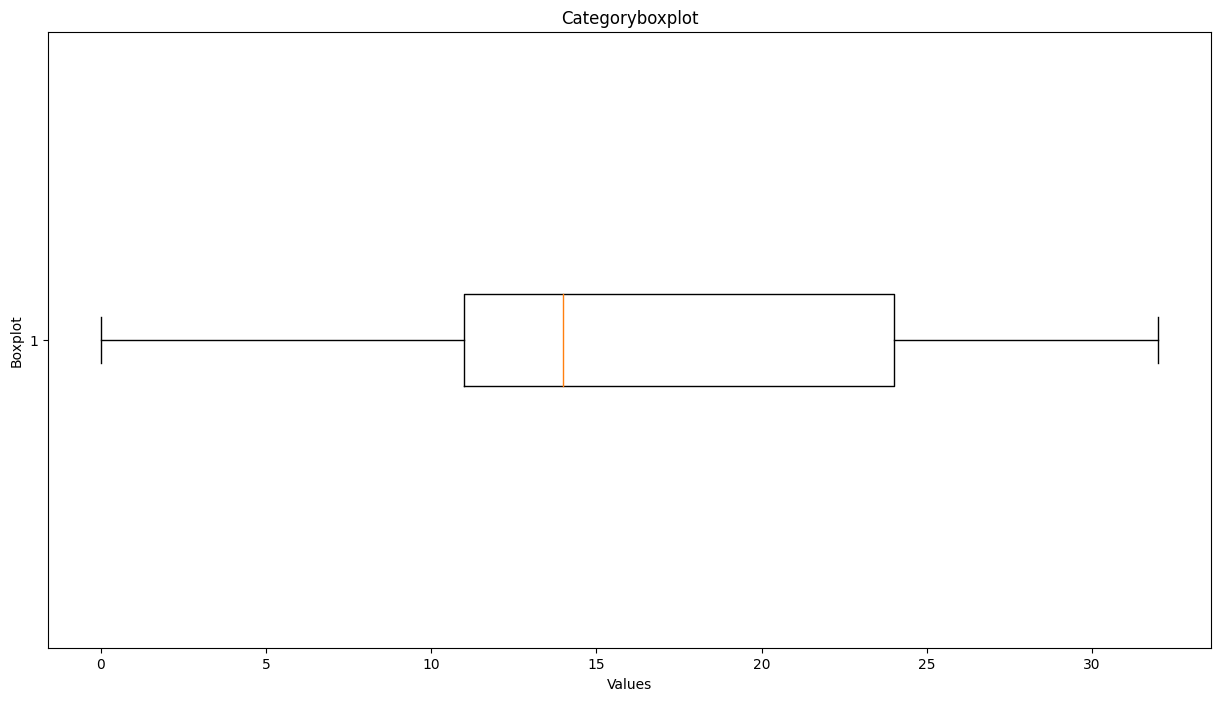

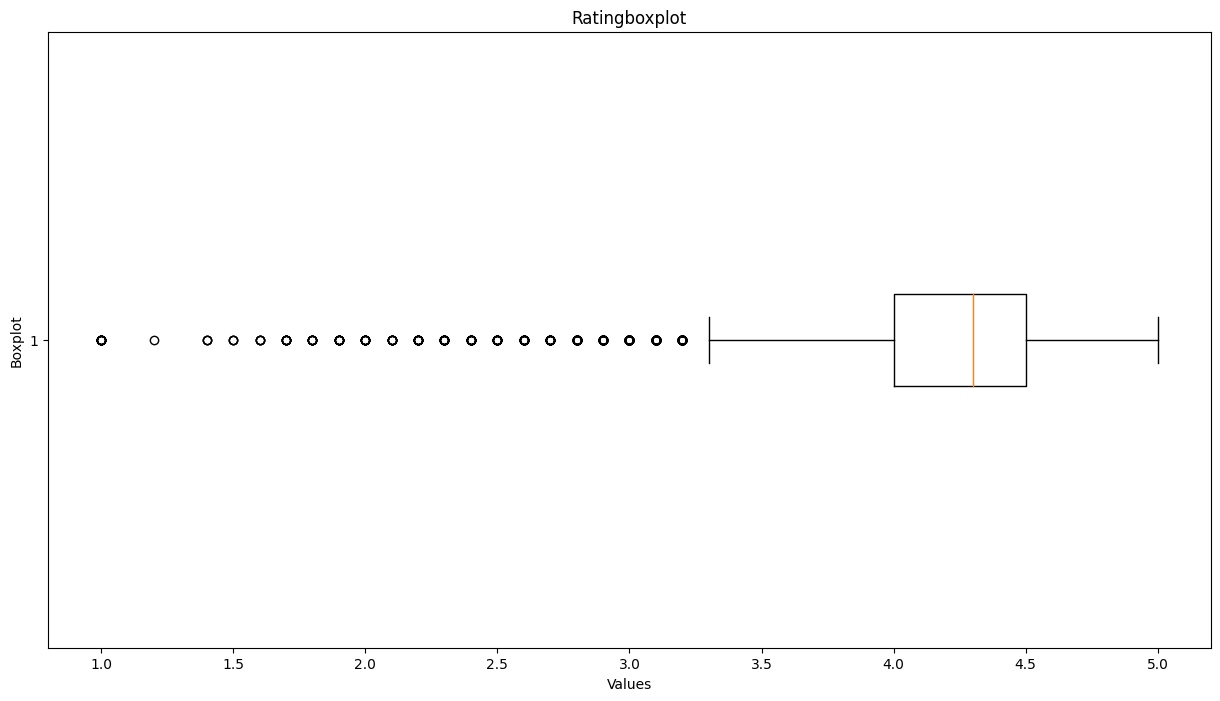

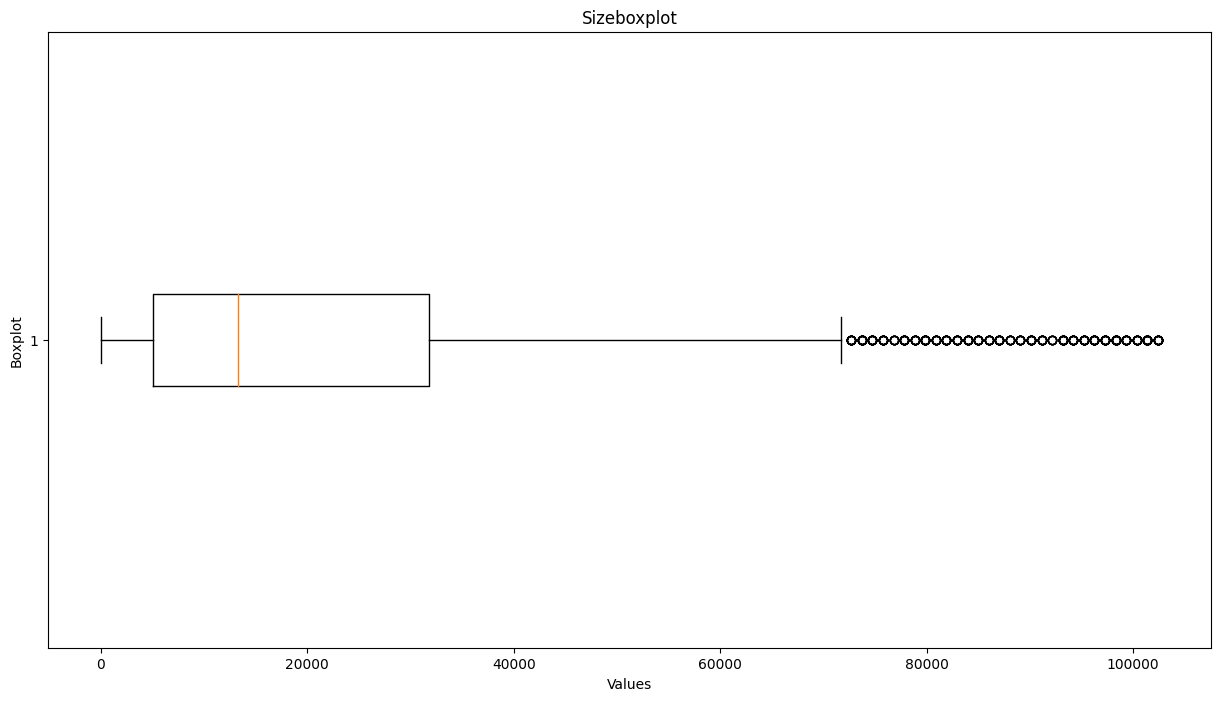

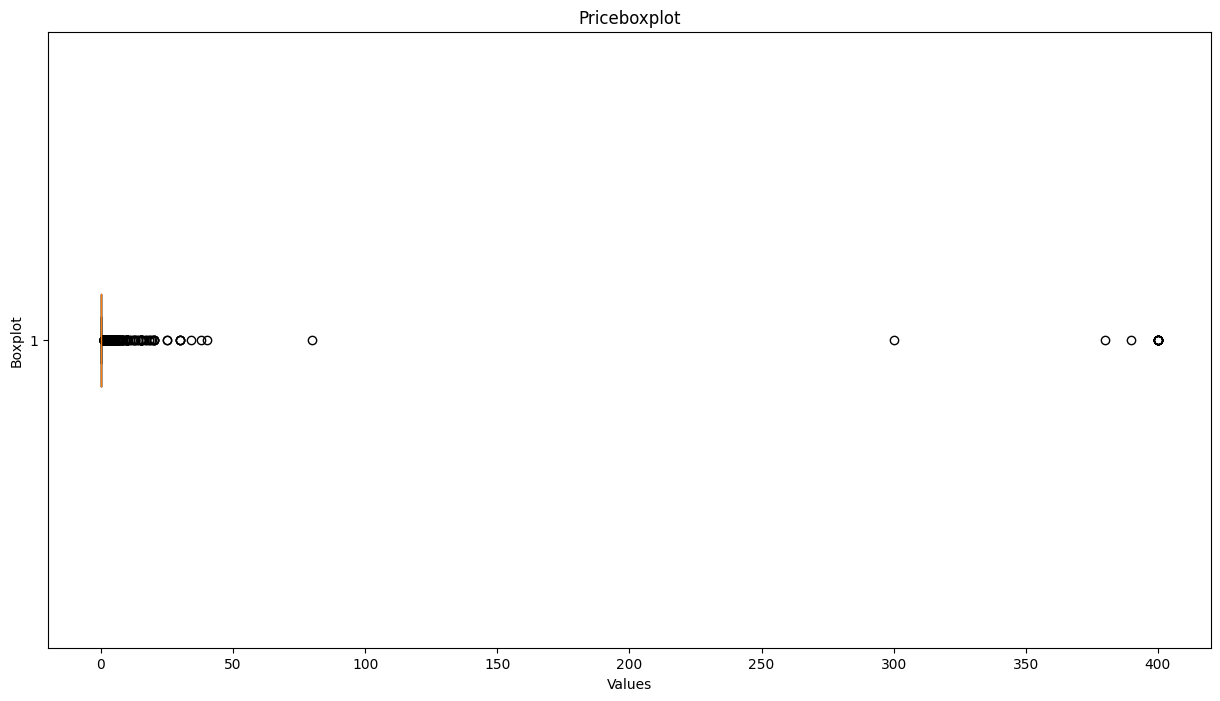

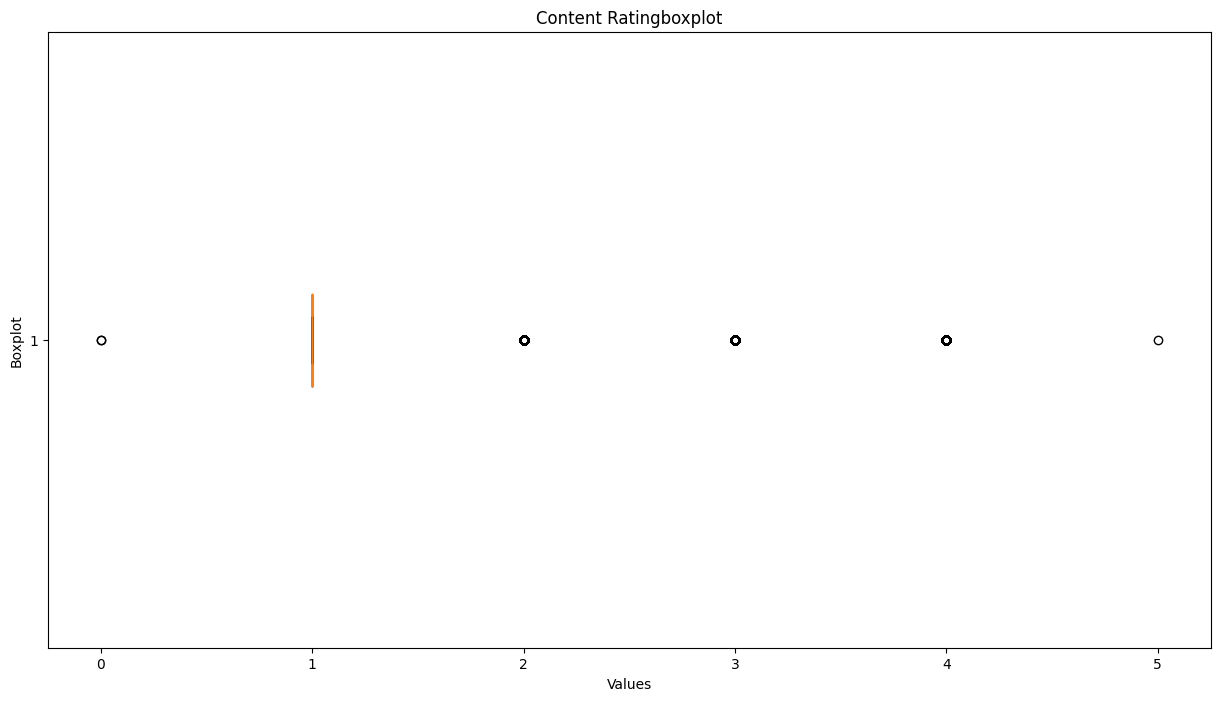

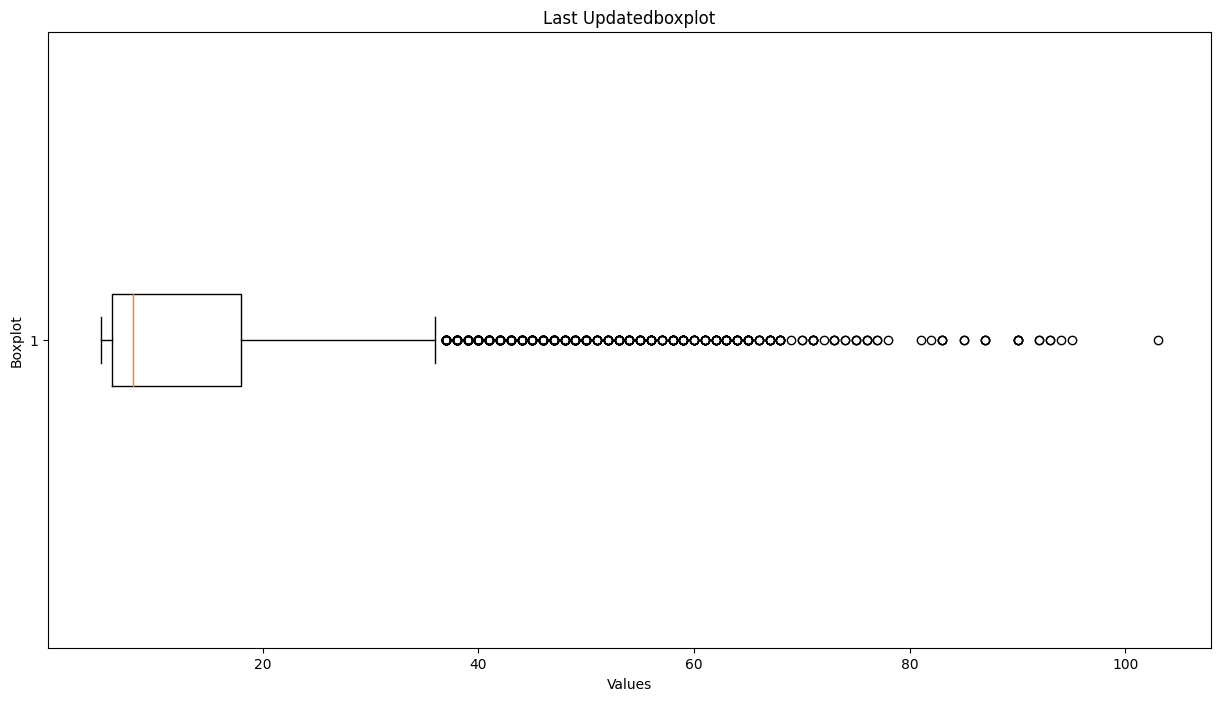

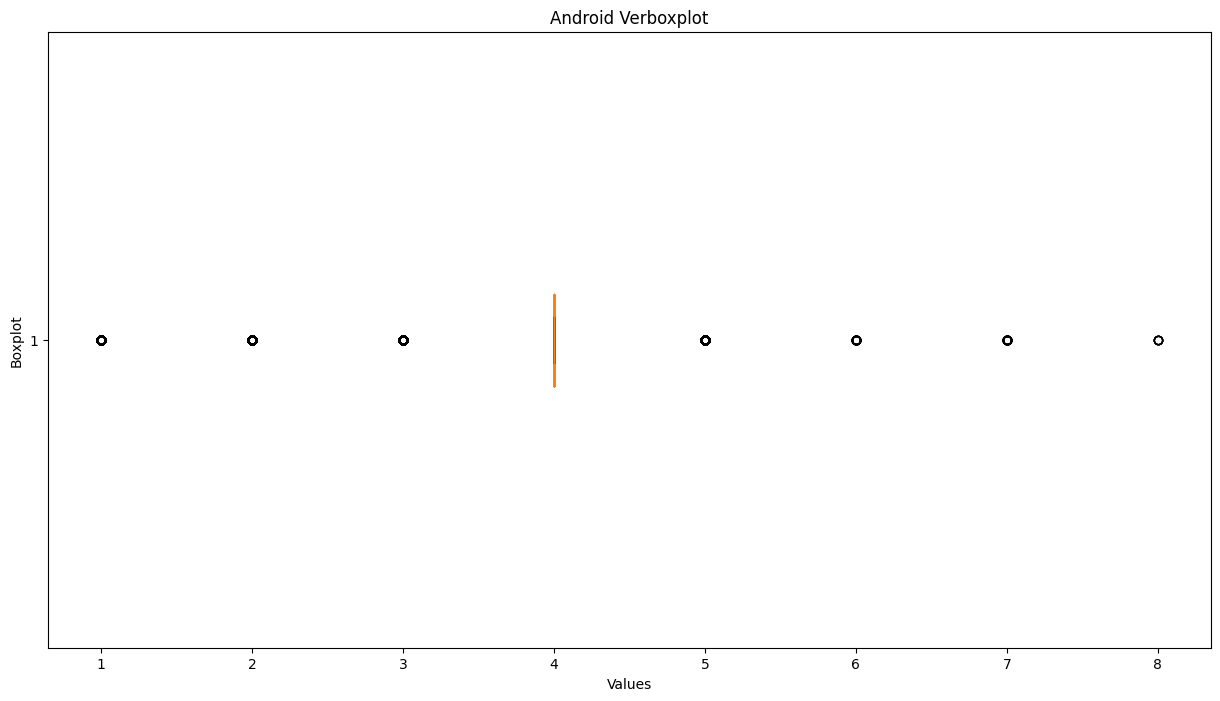

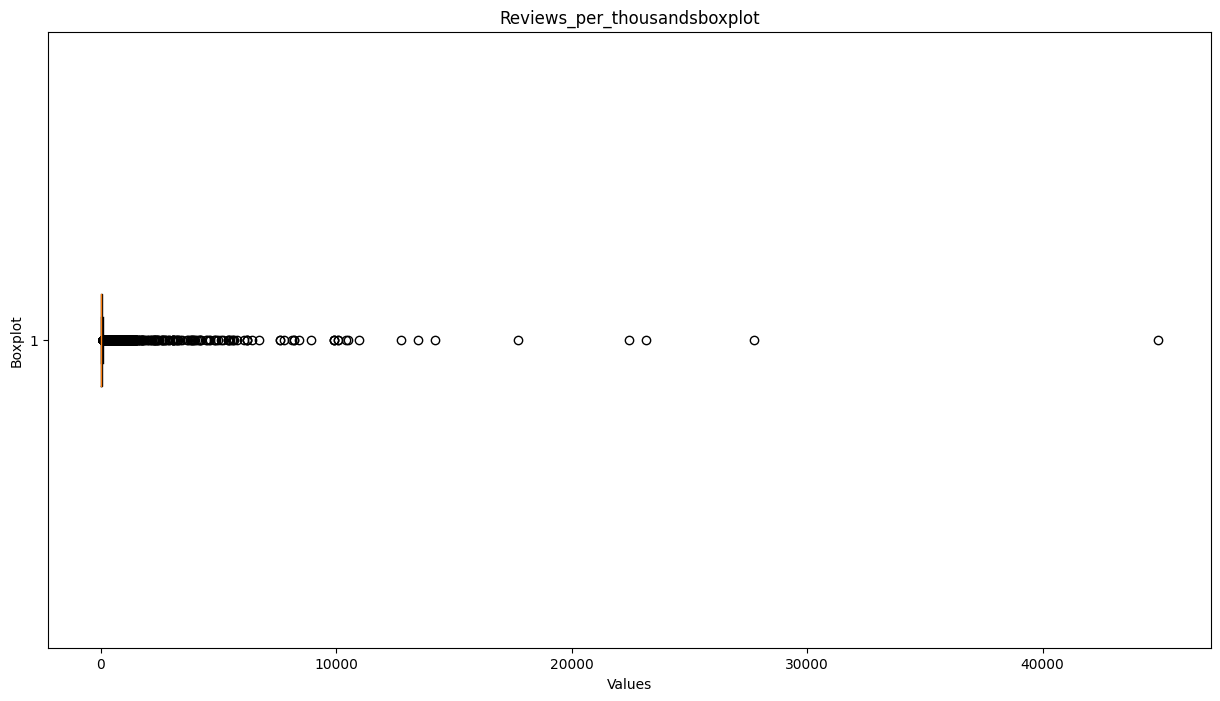

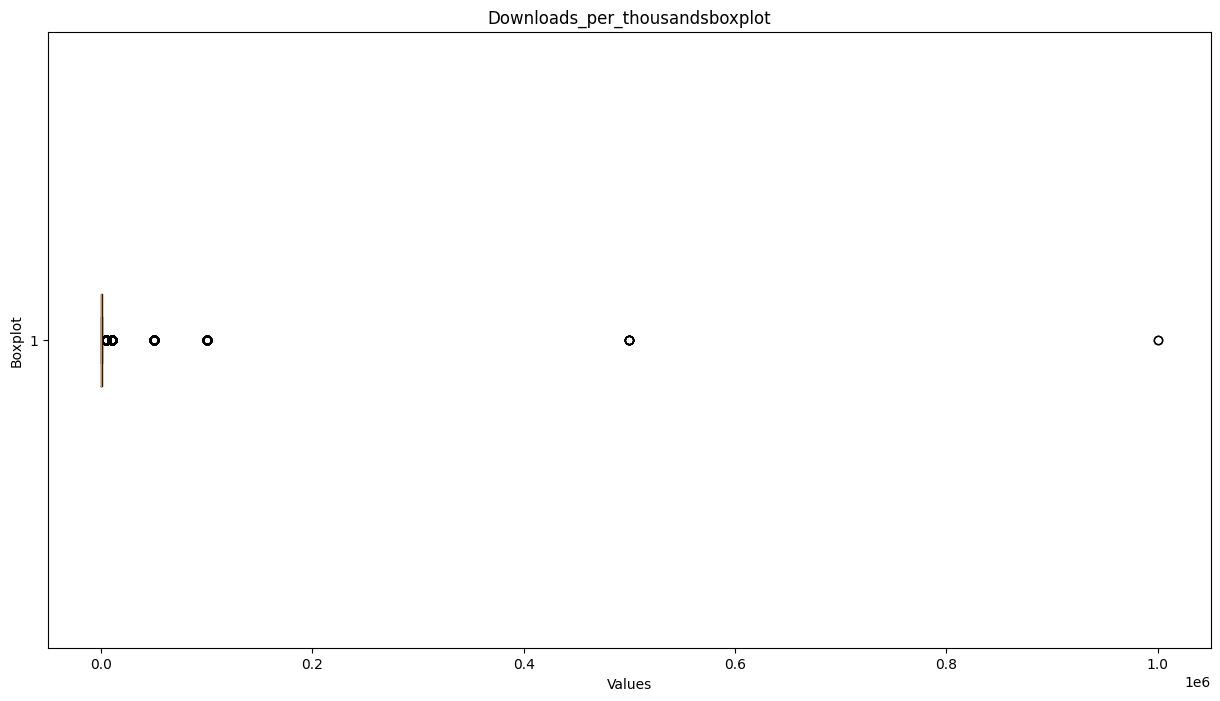

In [70]:
for col in k.columns:
    f, ax1 = plt.subplots(figsize = (15,8))
    plt.boxplot(k[col], vert = False)
    plt.title(col  +  'boxplot')
    plt.xlabel('Values')
    plt.ylabel('Boxplot')

<Axes: >

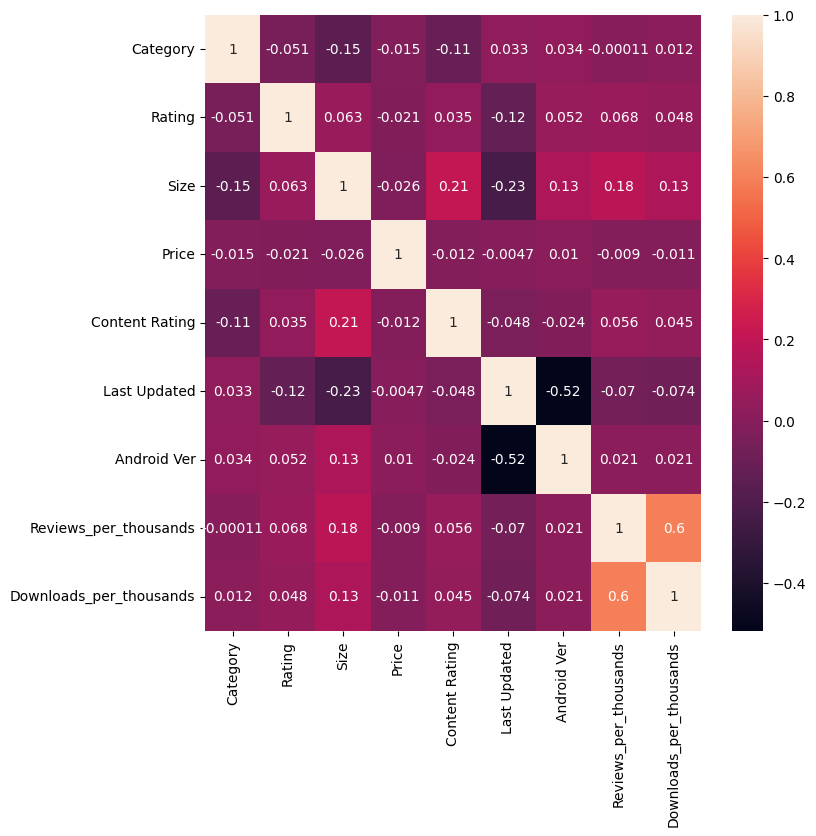

In [71]:
corr = k.corr()
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(corr, annot = True)


In [72]:
#Reviews and  downloads high a very high corelation, which indicates that the greater the review the more the downloads of an app
#last updated and android version is having high corelation

In [73]:
# Multicollinearity test
##- Variance Inflation factor (VIF) (stage 2)
###- If vif > 5, multicollinearity exist.

In [74]:
vif = pd.DataFrame()
features = k.drop(['Downloads_per_thousands'] , axis= 1)
vif['features_name'] = features.columns
vif['vif'] = [variance_inflation_factor(features.values,i) for i in range(features.shape[1])]

In [75]:
vif

,features_name,vif
0,Category,5.002470
1,Rating,21.835413
2,Size,2.193034
3,Price,1.005203
4,Content Rating,3.205607
5,Last Updated,2.380264
6,Android Ver,15.875578
7,Reviews_per_thousands,1.058534


In [76]:
###  Rating and Android Verion have VIF more than 5 so mukticolinearity doesnt exist. We remove the rating feature as it is having a high vif

In [77]:
k = k.drop(['Rating'], axis = 1)

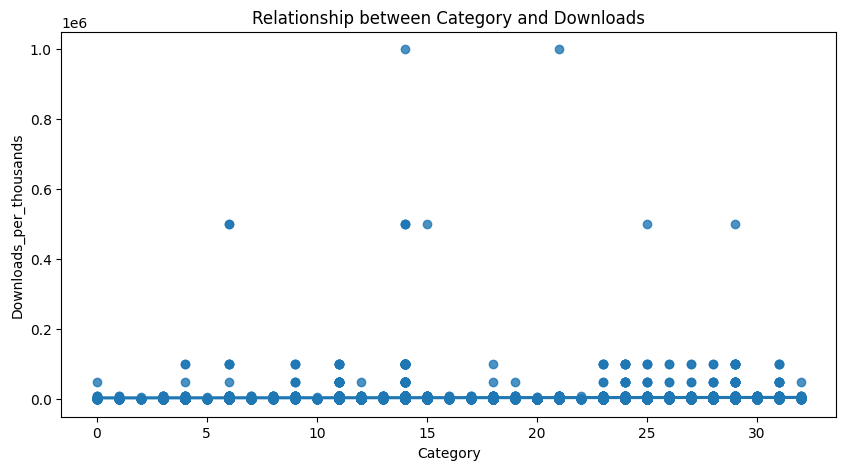

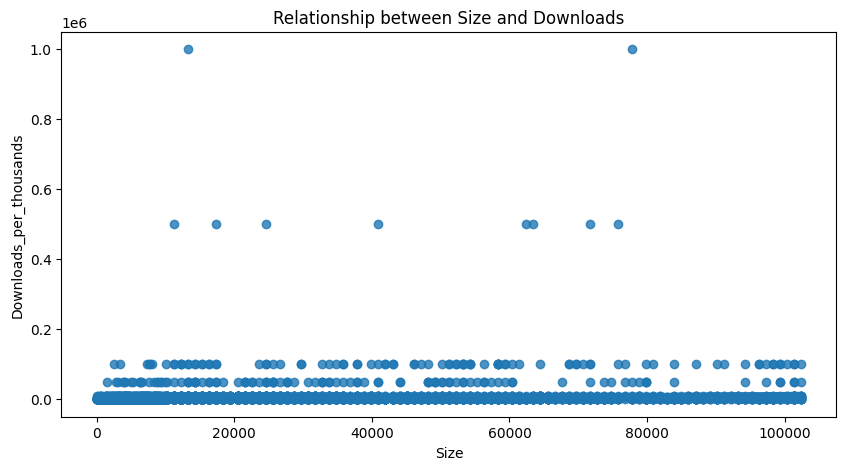

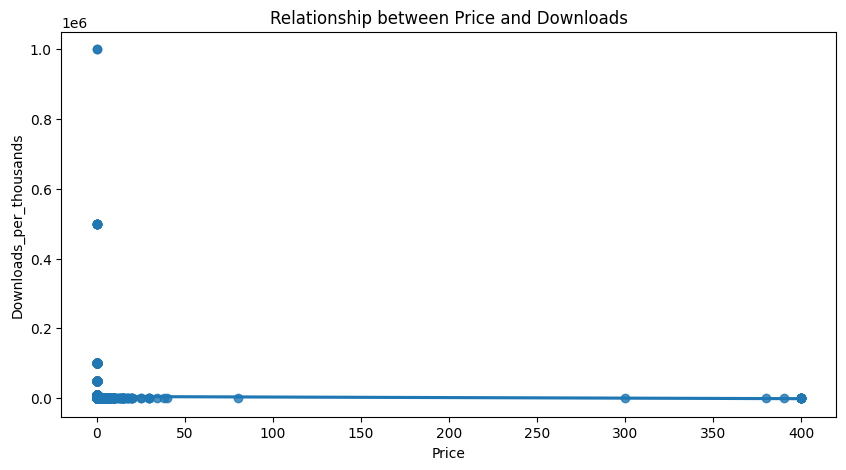

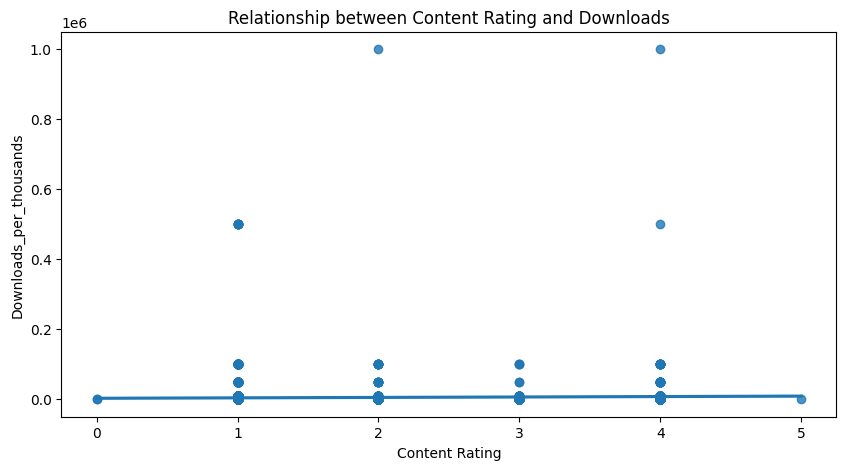

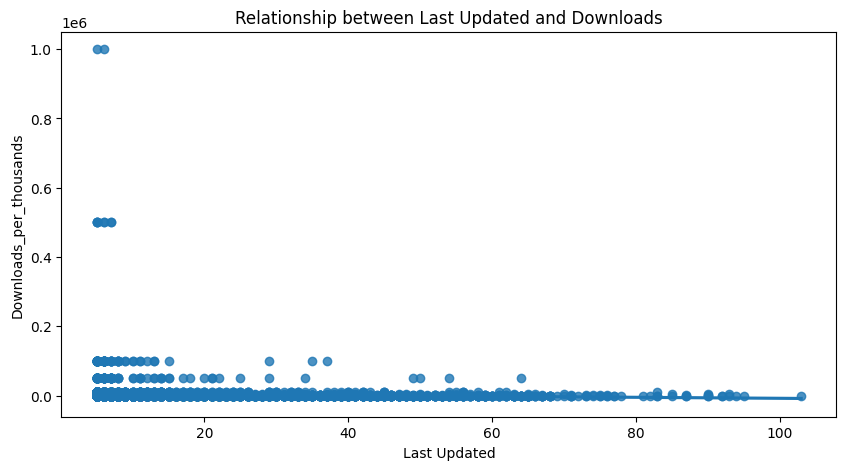

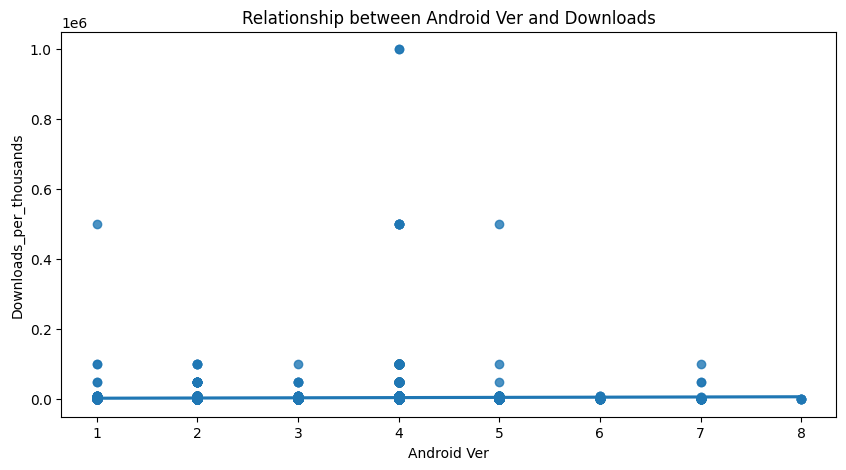

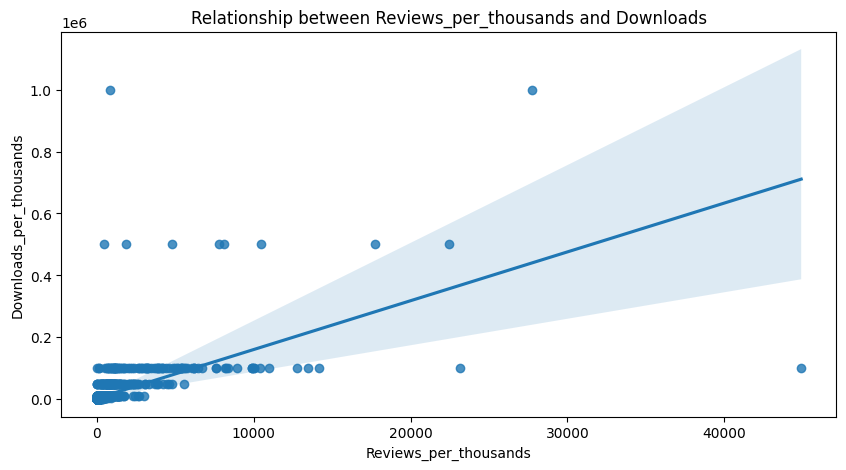

In [78]:
for col in k.columns:
    if col != 'Downloads_per_thousands':
        fig , ax1 = plt.subplots(figsize = (10 , 5))
        sns.regplot(x=k[col],y=k['Downloads_per_thousands'],ax = ax1).set_title(f'Relationship between {col} and Downloads')


Applying log transormation on Downloads & Reviews



In [79]:
k['Downloads_per_thousands_log'] = np.log1p(k['Downloads_per_thousands'])

k['Downloads_per_thousands_log'].unique()

array([2.39789527e+00, 6.21660610e+00, 8.51739317e+00, 1.08197983e+01,
       4.61512052e+00, 3.93182563e+00, 6.90875478e+00, 9.21044037e+00,
       1.79175947e+00, 1.15129355e+01, 6.93147181e-01, 1.31223654e+01,
       9.53101798e-02, 4.05465108e-01, 9.95033085e-03, 1.38155116e+01,
       4.98754151e-03, 4.87901642e-02, 9.99500333e-04])

In [80]:
k['Reviews_per_thousands_log'] = np.log1p(k['Reviews_per_thousands'])

k.Reviews_per_thousands_log.unique()

array([0.14755756, 0.67650954, 4.48311554, ..., 0.47187687, 0.78618205,
       5.98973054])

In [81]:
k.head(2)

,Category,Size,Price,Content Rating,Last Updated,Android Ver,Reviews_per_thousands,Downloads_per_thousands,Downloads_per_thousands_log,Reviews_per_thousands_log
0,0,19456.0,0.0,1,12.0,4.0,0.159,10.0,2.397895,0.147558
1,0,14336.0,0.0,1,11.0,4.0,0.967,500.0,6.216606,0.676510


In [82]:
k = k.drop(['Reviews_per_thousands','Downloads_per_thousands'], axis = 1)
k.head(2)

,Category,Size,Price,Content Rating,Last Updated,Android Ver,Downloads_per_thousands_log,Reviews_per_thousands_log
0,0,19456.0,0.0,1,12.0,4.0,2.397895,0.147558
1,0,14336.0,0.0,1,11.0,4.0,6.216606,0.676510


In [83]:
scaler = MinMaxScaler()
k['Size_scaled'] = scaler.fit_transform(df[['Size']])

k = k.drop(['Size'], axis = 1)
k.head(3)

,Category,Price,Content Rating,Last Updated,Android Ver,Downloads_per_thousands_log,Reviews_per_thousands_log,Size_scaled
0,0,0.0,1,12.0,4.0,2.397895,0.147558,0.189933
1,0,0.0,1,11.0,4.0,6.216606,0.676510,0.139929
2,0,0.0,1,5.0,4.0,8.517393,4.483116,0.086924


# **Model Building**
*Stages of Model Building:*

1)Custom Train Test Split Function

2)To perform Cross Validation

3)To do Hyperparameter Tuning

**First we head towards model building of different regression models**

In [84]:
X = k.drop('Downloads_per_thousands_log', axis =1)
y = k['Downloads_per_thousands_log']
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [85]:
def model_builder(model):
    
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test , y_pred)
    rmse = np.sqrt(mean_squared_error(y_test , y_pred))
    return(type(model).__name__ , r2, rmse)

models = [LinearRegression(), Lasso() , Ridge(), DecisionTreeRegressor() , SVR() , KNeighborsRegressor() ,RandomForestRegressor(),
         AdaBoostRegressor() , GradientBoostingRegressor() , XGBRegressor()]

for m in models:
    model_name, r2, rmse = model_builder(m)
    print(f"{model_name} R2 score: {r2:.3f}")
    print(f"{model_name} Rmse: {rmse:.3f}")

LinearRegression R2 score: 0.804
LinearRegression Rmse: 1.382
Lasso R2 score: 0.778
Lasso Rmse: 1.470
Ridge R2 score: 0.804
Ridge Rmse: 1.382
DecisionTreeRegressor R2 score: 0.856
DecisionTreeRegressor Rmse: 1.185
SVR R2 score: 0.814
SVR Rmse: 1.346
KNeighborsRegressor R2 score: 0.800
KNeighborsRegressor Rmse: 1.396
RandomForestRegressor R2 score: 0.924
RandomForestRegressor Rmse: 0.858
AdaBoostRegressor R2 score: 0.906
AdaBoostRegressor Rmse: 0.959
GradientBoostingRegressor R2 score: 0.930
GradientBoostingRegressor Rmse: 0.823
XGBRegressor R2 score: 0.925
XGBRegressor Rmse: 0.857


In [86]:
def model_builder(model):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error'))
    return {'Model': type(model).__name__, 'R2 Score': cv_scores.mean(), 'RMSE Score': cv_rmse_scores.mean()}

models = [LinearRegression(), Lasso() , Ridge(), DecisionTreeRegressor() , SVR() , KNeighborsRegressor() ,RandomForestRegressor(),         AdaBoostRegressor() , GradientBoostingRegressor() , XGBRegressor()]

results = []
for m in models:
    results.append(model_builder(m))

score = pd.DataFrame(results)
print(score)


                       Model  R2 Score  RMSE Score
0           LinearRegression  0.750373    1.425051
1                      Lasso  0.722147    1.509044
2                      Ridge  0.750375    1.425048
3      DecisionTreeRegressor  0.821875    1.203554
4                        SVR  0.760887    1.395138
5        KNeighborsRegressor  0.733645    1.469008
6      RandomForestRegressor  0.901847    0.891598
7          AdaBoostRegressor  0.884169    0.996853
8  GradientBoostingRegressor  0.910626    0.849862
9               XGBRegressor  0.898702    0.905334


In [87]:
# XGB, GB and Random forest yeilds the best result . GB gives the best result

We will perform hyper prameter tuning on Random Forest Regressor and Gradient Boost Regressor to find the best parameters with the best r2 score.

In [88]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)    
r2 = r2_score(y_test , y_pred)
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print('r2:', r2)
print('rmse:', rmse)

r2: 0.9237309459007067
rmse: 0.8619405497646305


In [89]:
##Check for overfitting
print('Training set score: {:.4f}'.format(rfr.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfr.score(X_test, y_test)))

Training set score: 0.9892
Test set score: 0.9237


The model is not overfitting

In [90]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)    
r2 = r2_score(y_test , y_pred)
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
print('r2:', r2)
print('rmse:', rmse)

r2: 0.9304919197805243
rmse: 0.8228502002707806


In [91]:
#Finding the bet hyprparameters for Random Forest Regressor

param_grid = {'n_estimators': [100, 200],'max_depth': [5, 10],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]}
rfr = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", np.sqrt(-grid_search.best_score_))
best_rfr = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rfr.fit(X_train, y_train)
y_pred = best_rfr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.8475779837375497
MSE: 0.7107849576505462
RMSE: 0.8430806353193899
R2 Score: 0.9270320805051374


In [92]:
##Finding the bet hyprparameters for Gradient Boost Regressor
param_grid = {'n_estimators': [100, 200],'learning_rate': [0.05, 0.1],'max_depth': [3, 5],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]}
gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", np.sqrt(-grid_search.best_score_))
best_gbr = GradientBoostingRegressor(**grid_search.best_params_, random_state=42)
best_gbr.fit(X_train, y_train)
y_pred = best_gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.836848783330556
MSE: 0.6776933411692802
RMSE: 0.8232213196761125
R2 Score: 0.9304292069937751


Post Hyper parameter Tuning Random Forest Regressor gives an R2 score of 0.927 and Gradient Boost Regressor gives an R2 score of 0.93

# Now lets try to work on classification to see the accuracy



#CLASIFICATION

In [93]:
df.head()

,App,Category,Rating,Size,Price,Content Rating,Last Updated,Android Ver,Reviews_per_thousands,Downloads_per_thousands
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,19456.0,0.0,1,12.0,4.0,0.159,10.0
1,Coloring book moana,0,3.9,14336.0,0.0,1,11.0,4.0,0.967,500.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,8908.8,0.0,1,5.0,4.0,87.510,5000.0
3,Sketch - Draw & Paint,0,4.5,25600.0,0.0,4,7.0,4.0,215.644,50000.0
4,Pixel Draw - Number Art Coloring Book,0,4.3,2867.2,0.0,1,6.0,4.0,0.967,100.0


In [94]:
c = df.drop(['App'], axis = 1)

In [95]:
scaler = MinMaxScaler()
c['Size_scaled'] = scaler.fit_transform(df[['Size']])

c = c.drop(['Size'], axis = 1)
c.head(3)

,Category,Rating,Price,Content Rating,Last Updated,Android Ver,Reviews_per_thousands,Downloads_per_thousands,Size_scaled
0,0,4.1,0.0,1,12.0,4.0,0.159,10.0,0.189933
1,0,3.9,0.0,1,11.0,4.0,0.967,500.0,0.139929
2,0,4.7,0.0,1,5.0,4.0,87.510,5000.0,0.086924


In [96]:
c['Downloads']=c['Downloads_per_thousands']*1000
c['Downloads'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01, 1.e+09,
       5.e+00, 5.e+01, 1.e+00])

In [97]:
# Define the bins and categories
bins = [0, 1000, 10000,  100000, 10000000, np.inf]
categories = [0, 1, 2, 3, 4]         # 0 = very low, 1 = low, 2 = medium, 3 = high, 4 = very high 

# Bin the values into categories
c['Downloads category'] = pd.cut(c['Downloads'], bins=bins, labels=categories, right=True)

# Print the original and binned data
print(c[['Downloads', 'Downloads category']])

        Downloads Downloads category
0         10000.0                  1
1        500000.0                  3
2       5000000.0                  3
3      50000000.0                  4
4        100000.0                  2
...           ...                ...
10833      1000.0                  0
10834       500.0                  0
10836      5000.0                  1
10837       100.0                  0
10840  10000000.0                  3

[7025 rows x 2 columns]


In [98]:
c['Downloads category'].value_counts()

3    2732
2    1416
1    1360
0    1300
4     217
Name: Downloads category, dtype: int64

In [99]:
c['Downloads category'] = c['Downloads category'].astype('category').cat.codes.astype(int)

In [100]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7025 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Category                 7025 non-null   int64  
 1   Rating                   7025 non-null   float64
 2   Price                    7025 non-null   float64
 3   Content Rating           7025 non-null   int64  
 4   Last Updated             7025 non-null   float64
 5   Android Ver              7025 non-null   float64
 6   Reviews_per_thousands    7025 non-null   float64
 7   Downloads_per_thousands  7025 non-null   float64
 8   Size_scaled              7025 non-null   float64
 9   Downloads                7025 non-null   float64
 10  Downloads category       7025 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 658.6 KB


In [101]:
c = c.drop(['Downloads_per_thousands', 'Downloads',], axis = 1)
c.head(2)

,Category,Rating,Price,Content Rating,Last Updated,Android Ver,Reviews_per_thousands,Size_scaled,Downloads category
0,0,4.1,0.0,1,12.0,4.0,0.159,0.189933,1
1,0,3.9,0.0,1,11.0,4.0,0.967,0.139929,3


In [102]:
c = c.drop(['Rating',], axis = 1)

In [103]:
Xc = c.drop('Downloads category', axis =1)
yc = c['Downloads category']
Xc_train, Xc_test , yc_train, yc_test = train_test_split(Xc,yc, test_size = 0.2, random_state = 1)

In [104]:
print(Xc_train.shape)
print(Xc_test.shape)
print(yc_train.shape)
print(yc_test.shape)

(5620, 7)
(1405, 7)
(5620,)
(1405,)


In [105]:
yc_test.value_counts()

3    532
0    281
2    272
1    271
4     49
Name: Downloads category, dtype: int64

In [106]:
yc_train.value_counts()

3    2200
2    1144
1    1089
0    1019
4     168
Name: Downloads category, dtype: int64

In [107]:
def clf_model_builder(clf_model):
    
    clf_model.fit(Xc_train , yc_train)
    yc_pred = clf_model.predict(Xc_test)
    accuracy = accuracy_score(yc_test, yc_pred)
    return("Classification accuracy:", accuracy)

In [108]:
clf_models = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),DecisionTreeClassifier(), SVC()]

In [109]:
for model in clf_models:
    print(type(model).__name__)
    print(clf_model_builder(model))
    print()

RandomForestClassifier
('Classification accuracy:', 0.8177935943060498)

AdaBoostClassifier
('Classification accuracy:', 0.6491103202846975)

GradientBoostingClassifier
('Classification accuracy:', 0.8120996441281139)

DecisionTreeClassifier
('Classification accuracy:', 0.7423487544483985)

SVC
('Classification accuracy:', 0.4185053380782918)



In [110]:
def clf_model_builder(clf_model):
    cv_scores = cross_val_score(clf_model, Xc, yc, cv=5)
    return("Cross-validation accuracy:", cv_scores.mean())

for model in clf_models:
    print(type(model).__name__)
    print(clf_model_builder(model))
    print()

RandomForestClassifier
('Cross-validation accuracy:', 0.7971530249110319)

AdaBoostClassifier
('Cross-validation accuracy:', 0.6741637010676157)

GradientBoostingClassifier
('Cross-validation accuracy:', 0.7965836298932384)

DecisionTreeClassifier
('Cross-validation accuracy:', 0.732526690391459)

SVC
('Cross-validation accuracy:', 0.42889679715302487)



***Working to further improve model accuracy***

In [111]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(Xc_train, yc_train)
yc_pred = rfc.predict(Xc_test)
accuracy = accuracy_score(yc_test, yc_pred)
accuracy

0.8128113879003559

In [115]:
# Checking for overfitting
print('Training set score: {:.4f}'.format(rfc.score(Xc_train, yc_train)))

print('Test set score: {:.4f}'.format(rfc.score(Xc_test, yc_test)))

Training set score: 1.0000
Test set score: 0.8128


There can be signs of overfitting

In [112]:
#Lets perform hyper parameter tuning on the random forest model. 

In [113]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
    }

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(Xc_train, yc_train)

print("Best hyperparameters: ", grid_search.best_params_)

yc_pred = grid_search.predict(Xc_test)
accuracy = accuracy_score(yc_test, yc_pred)
print("Test accuracy: ", accuracy)

Best hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test accuracy:  0.8199288256227758


Post Hyper Parameter tuning the Random Forest Classifier gives an accuracy of 0.82 (rounded)

# **Results, outcomes and findings**
Both Regression & Classification Models were built and compared. Regression Models performed better as compared to Classification Models.  Random Forest Regressor & Gradient Boost Regressor gave the highest R-Squared value which was further improved by performing hyperparameter tuning. For Classification Models , Random Forest Classifier was chosen for Hyper prameter tuning.

Post Hyper parameter tuning, the R Squared score of Random Forest Regressor was 0.927 and Gradient Boost Regressor was 0.93.

Accuracy score post Hyper parameter tuning of Random Forest Classifier was 0.82.




